<a href="https://colab.research.google.com/github/amiegirl/Fellowship_AI_NLP_Challenge/blob/main/sentiment_analysis_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip -q /content/imdb-dataset-of-50k-movie-reviews -d /content/kaggle_input

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('imdb-dataset-of-50k-movie-reviews.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# import dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the diffe

# EDA

In [ ]:
# y value count
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# check data shape
df.shape

(50000, 2)

In [ ]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# check null values
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# convert review text to lowercase
df['review'] = df['review'].str.lower()

# replace special characters, numbers with space
df['review'] = df['review'].str.replace('[^\w\s]|[0-9]+', "", regex=True)

In [ ]:
df.head(2)

,review,sentiment
0,one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare ...,positive
1,a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,positive


# Sentiment Analysis

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from random_word import RandomWords
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay

# Word cloud of the most positive and negative reviews

In [ ]:
#Separate data into positive and negative reviews

positive_rev = " ".join(i for i in df[df['sentiment'] == 'positive']['review'])
negative_rev = " ".join(i for i in df[df['sentiment'] == 'negative']['review'])

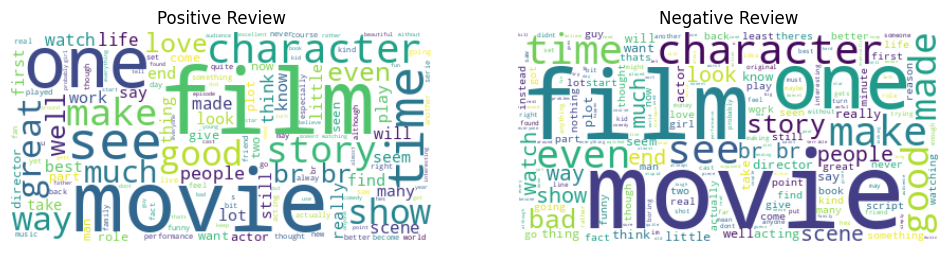

In [ ]:
#Wordcloud
stopwords = set(STOPWORDS)
wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(positive_rev)
wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(negative_rev)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[12,10])
ax1.imshow(wordcloud_positive,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Positive Review')
ax2.imshow(wordcloud_negative,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Negative Review');

# Modelling

## Remove Stopwords

In [ ]:
#nltk.download('stopwords')

In [ ]:
# Remove stop words from review text
stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = " ".join(word for word in text.split() if word not in stopword)
    return text

df['review'] = df['review'].apply(clean_stopwords)

# Stemming

In [ ]:
#stemming
ps = PorterStemmer()
def stemmatization(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text
df['review'] = df['review'].apply(stemmatization)

# Lemmatization

In [ ]:
#nltk.download('wordnet')

In [ ]:
# Lemmatization
lem = WordNetLemmatizer()
def lemmatization (text):
    text = [lem.lemmatize(word) for word in text.split() if word in text]
    return " ".join(text)
df['review'] = df['review'].apply(lemmatization)

In [ ]:
df.head(2)

,review,sentiment
0,one review mention watch oz episod youll hook right exactli happen mebr br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordbr br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awaybr br would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz ...,positive
1,wonder littl product br br film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sen realism entir piec br br actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sen particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done,positive


# TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(df['review'])
vector = vectorizer.transform(df['review'])
print(vector)

  (0, 136701)	0.0488957066503809
  (0, 135288)	0.050746736216435655
  (0, 135271)	0.025701175850165063
  (0, 134884)	0.10833125000568675
  (0, 134881)	0.04518853782056653
  (0, 133484)	0.19861117910161716
  (0, 132363)	0.02735348962136844
  (0, 131643)	0.07255067732190802
  (0, 130198)	0.21207224166420116
  (0, 129984)	0.13323047445505
  (0, 128556)	0.03430235302484928
  (0, 127237)	0.10003150852256566
  (0, 126675)	0.0738053933073808
  (0, 125346)	0.036988965484304664
  (0, 124997)	0.0635053469030399
  (0, 123613)	0.04952917192946268
  (0, 122494)	0.0946876685951281
  (0, 121190)	0.02916775425127313
  (0, 119276)	0.05840486015720198
  (0, 117704)	0.06824579986931997
  (0, 116063)	0.14980134303168702
  (0, 115812)	0.05487370098791124
  (0, 114523)	0.05197987596147996
  (0, 114337)	0.07015316257064484
  (0, 111944)	0.0738053933073808
  :	:
  (49999, 64833)	0.18585221171089045
  (49999, 59829)	0.145625051180551
  (49999, 58701)	0.09775904990481614
  (49999, 58398)	0.16727406969805755
  (

In [ ]:
# Relace target variable
df['sentiment'] =df['sentiment'].str.replace('negative','0')
df['sentiment'] =df['sentiment'].str.replace('positive','1')

In [ ]:
# Convert sentiment to int data type
df['sentiment']= df['sentiment'].astype(int)

In [ ]:
# Split Data
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2,stratify=y,random_state=0)

## Model

In [ ]:
# Initialize model

RANDOM_STATE = 0
logit = LogisticRegression(max_iter = 1000, random_state=RANDOM_STATE)
rf = RandomForestClassifier(random_state=RANDOM_STATE)
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

models = {'Logistic_Regression':logit, 'RandomForest_Classifier':rf,
        'DecisionTree_Classifier':dt}

# Train models

classifiers = []
for classifier,model in models.items():
    model.fit(X_train,y_train)
    classifiers.append(classifier)

# Evaluation

## Evaluation model

In [ ]:
# Evaluating model

accuracy_list, auc_list = [], []
for classifier,model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    test_score = model.score(X_test,y_test)
    accuracy_list.append(test_score)
    auc_score = roc_auc_score(y_test, y_proba)
    auc_list.append(auc_score)
    print(f"{classifier} Test Set Accuracy:{test_score} ROC AUC Score: {auc_score}")

Logistic_Regression Test Set Accuracy:0.8933 ROC AUC Score: 0.956069
RandomForest_Classifier Test Set Accuracy:0.851 ROC AUC Score: 0.92601522
DecisionTree_Classifier Test Set Accuracy:0.7222 ROC AUC Score: 0.7222


LogisticRegression(max_iter=1000, random_state=0) Confusion matrix:
[[4397  603]
 [ 464 4536]]
====


LogisticRegression(max_iter=1000, random_state=0) Classification report:
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      5000
    Positive       0.88      0.91      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

RandomForestClassifier(random_state=0) Confusion matrix:
[[4273  727]
 [ 763 4237]]
====


RandomForestClassifier(random_state=0) Classification report:
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      5000
    Positive       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

DecisionTreeClassi

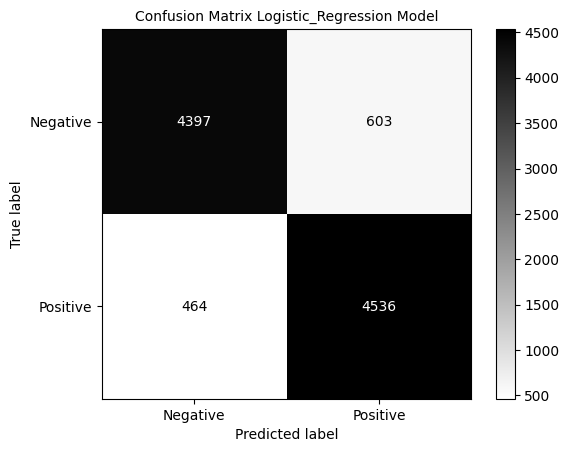

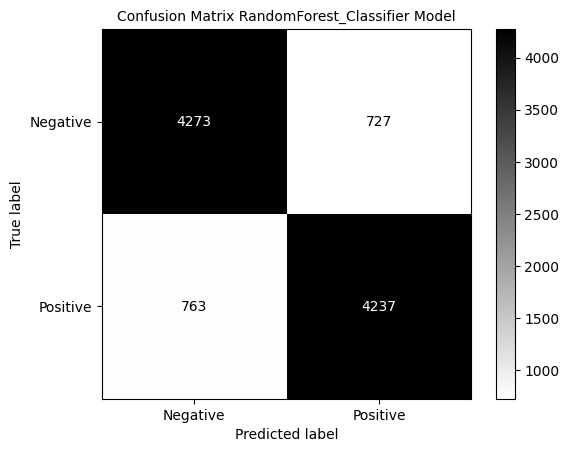

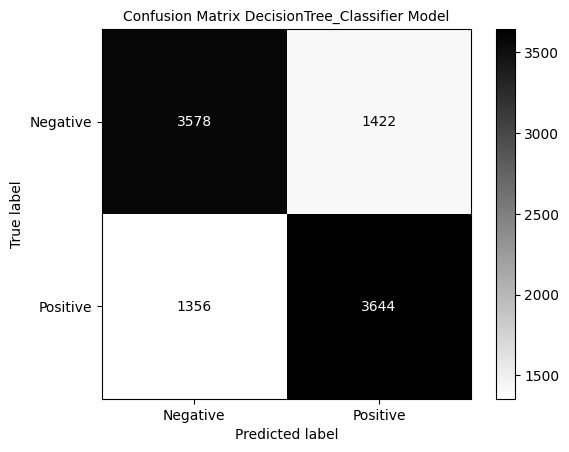

In [ ]:
# Confusion matrix
for classifier,model in models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('{} Confusion matrix:'.format(model))
    print(conf_matrix)
    print("====\n\n")

    # Display Confusion Matrix
    labels = ['0', '1']
    labels = ["Negative", "Positive"]
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
    display.plot(cmap=plt.cm.gray_r)
    plt.title(f"Confusion Matrix {classifier} Model", size=10);

    # Classification report
    class_report = classification_report(y_test, y_pred, target_names=labels)
    print('{} Classification report:'.format(model))
    print(class_report)

In [ ]:
# Making a Dataframe of Classifiers data and metrics

classifiers_metrics_df = pd.DataFrame({'Classifiers': classifiers,'Accuracy_score': accuracy_list, 'ROC_AUC_score': auc_list})
classifiers_metrics_df

,Classifiers,Accuracy_score,ROC_AUC_score
0,Logistic_Regression,0.8933,0.956069
1,RandomForest_Classifier,0.8510,0.926015
2,DecisionTree_Classifier,0.7222,0.722200


In [ ]:
# Transpose metrics df
classifiers_metrics_df = classifiers_metrics_df.set_index('Classifiers')
classifiers_metrics_df = classifiers_metrics_df.transpose()
classifiers_metrics_df

Classifiers,Logistic_Regression,RandomForest_Classifier,DecisionTree_Classifier
Accuracy_score,0.893300,0.851000,0.7222
ROC_AUC_score,0.956069,0.926015,0.7222


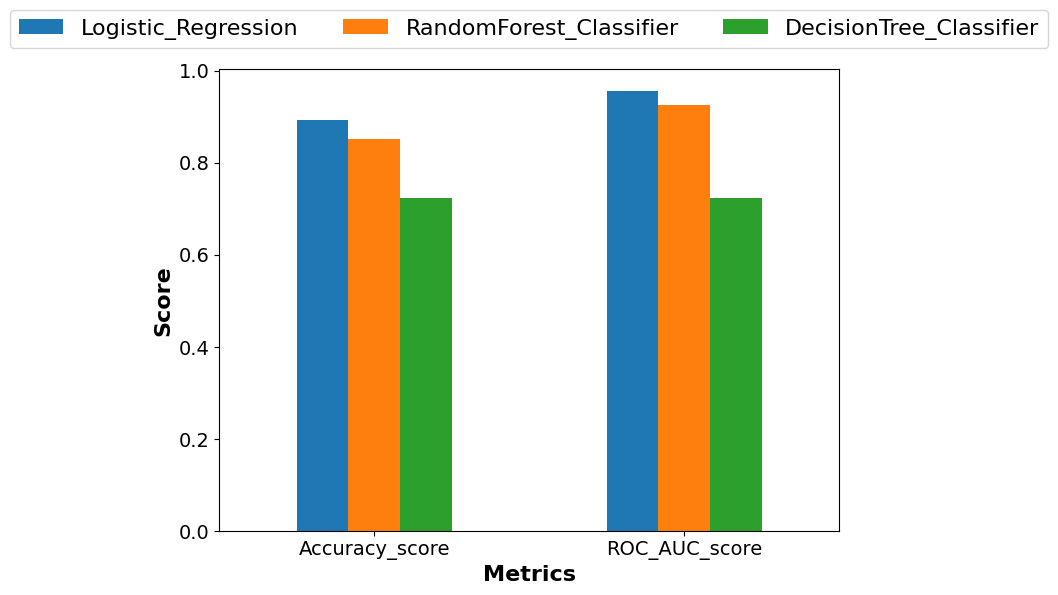

In [ ]:
# Display chart of classifiers metrics
ax = classifiers_metrics_df.plot.bar(figsize=[8, 6])
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", ncol=3, fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel("Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=16, fontweight="bold")
ax;

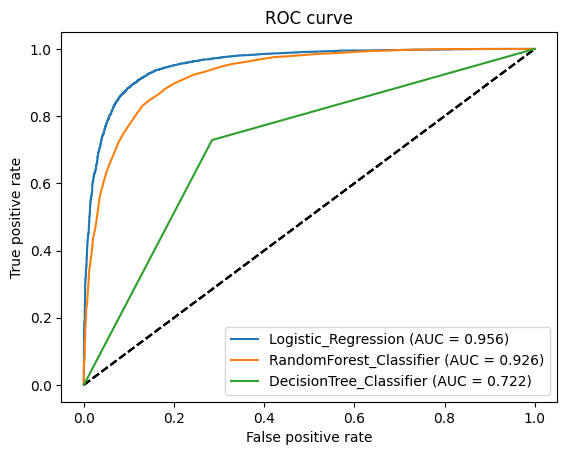

In [ ]:
# Plot ROC curve for all trained models together

plt.figure
for classifier,model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='{} (AUC = {:.3f})'.format(classifier,auc_score))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best');

As we can see from the given AUC metric curve above, Logistic Regression outperforms the other classifiers.